## Source

- Annual percentage changes obtained from Table 3.2(b), page 19 from the 2023 Statistical Abstract.
- Cement production data obtained from Table 3.3, page 20 from the 2023 Statistical Abstract.

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import EDAUtils, TransportUtils, GeneralUtils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

## Apply percentage changes

In [5]:
# Load raw input data
uganda_global_inputs_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uganda_global_inputs_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Filter to only prodinit_ippu inputs
prod_init_vars = [c for c in uganda_global_inputs_df.columns if c.startswith("prodinit_ippu_")]
prodinit_ippu_df = uganda_global_inputs_df[prod_init_vars]
prodinit_ippu_df.head()

,prodinit_ippu_cement_tonne,prodinit_ippu_plastic_tonne,prodinit_ippu_lime_and_carbonite_tonne,prodinit_ippu_glass_tonne,prodinit_ippu_paper_tonne,prodinit_ippu_rubber_and_leather_tonne,prodinit_ippu_mining_tonne,prodinit_ippu_electronics_tonne,prodinit_ippu_metals_tonne,prodinit_ippu_chemicals_tonne,prodinit_ippu_textiles_tonne,prodinit_ippu_recycled_metals_tonne,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_recycled_textiles_tonne,prodinit_ippu_recycled_plastic_tonne,prodinit_ippu_wood_tonne,prodinit_ippu_recycled_glass_tonne,prodinit_ippu_recycled_paper_tonne
0,26466237.38,82221.10382,99844.36679,6978.867111,188071.4111,6740.876602,448252.5694,50493.79028,453038.4103,50906.96393,17640.29720,0,0,0,0,1424850.75,0,0
1,23815432.61,93925.43016,140230.60570,6615.291246,228983.7753,6199.723652,334143.8102,81527.67190,462878.1583,85320.09634,26026.08555,0,0,0,0,1424850.75,0,0
2,15030268.09,84163.35982,45881.38812,6082.123108,214598.4164,5118.865148,492534.6393,77150.27766,440801.3604,76640.83964,23327.48714,0,0,0,0,1424850.75,0,0
3,15825335.83,99505.70206,23835.14788,4993.741643,242605.4607,4888.411757,528982.8348,53913.77221,509570.8570,78776.01375,23820.92913,0,0,0,0,1424850.75,0,0
4,13338189.99,87730.22728,137504.03830,4528.242526,191638.3032,3788.307612,344565.3709,49651.10226,488469.3812,70335.72750,21821.11512,0,0,0,0,1424850.75,0,0


In [7]:
# Keep only the first row
df_to_project = prodinit_ippu_df.iloc[[0]].copy()
df_to_project

,prodinit_ippu_cement_tonne,prodinit_ippu_plastic_tonne,prodinit_ippu_lime_and_carbonite_tonne,prodinit_ippu_glass_tonne,prodinit_ippu_paper_tonne,prodinit_ippu_rubber_and_leather_tonne,prodinit_ippu_mining_tonne,prodinit_ippu_electronics_tonne,prodinit_ippu_metals_tonne,prodinit_ippu_chemicals_tonne,prodinit_ippu_textiles_tonne,prodinit_ippu_recycled_metals_tonne,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_recycled_textiles_tonne,prodinit_ippu_recycled_plastic_tonne,prodinit_ippu_wood_tonne,prodinit_ippu_recycled_glass_tonne,prodinit_ippu_recycled_paper_tonne
0,26466237.38,82221.10382,99844.36679,6978.867111,188071.4111,6740.876602,448252.5694,50493.79028,453038.4103,50906.96393,17640.2972,0,0,0,0,1424850.75,0,0


In [8]:
# Load percentage change df
percentage_change_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "ippu", "index_of_industrial_production_uganda_2018_2022.csv"))
percentage_change_df

,Description,Weights,2018,2019,2020,2021,2022
0,Total Manufacturing,1000,9.4,3.5,5.6,7.8,4.3
1,Food Processing,400,29.3,-4.7,2.5,10.2,4.0
2,Drinks and Tobacco,201,3.7,11.8,-4.4,18.7,10.1
3,"Textiles, Clothing And Foot Wear",43,2.1,19.7,39.4,-5.5,3.1
4,"Sawmilling, Paper and Printing",35,9.8,-8.6,-7.3,3.0,0.8
5,"Chemicals, Paint, Soap & Foam Products",97,-24.6,21.3,14.8,5.5,-2.6
6,Bricks & Cement,75,14.1,2.6,28.4,-3.7,1.3
7,Metal Products,83,-8.5,-3.0,8.4,1.6,5.2
8,Miscellaneous,66,14.0,3.2,4.6,-8.9,0.9


In [9]:
# Pivot from wide to long format
df_melted = percentage_change_df.melt(id_vars=["Description", "Weights"], var_name="Year", value_name="Value")

# Pivot the melted DataFrame
df_pivot = df_melted.pivot(index="Year", columns="Description", values="Value").reset_index()

# Optional: reorder columns so 'Year' comes first
df_pivot = df_pivot[["Year"] + [col for col in df_pivot.columns if col != "Year"]]

percentage_change_df = df_pivot.copy()
percentage_change_df

Description,Year,Bricks & Cement,"Chemicals, Paint, Soap & Foam Products",Drinks and Tobacco,Food Processing,Metal Products,Miscellaneous,"Sawmilling, Paper and Printing","Textiles, Clothing And Foot Wear",Total Manufacturing
0,2018,14.1,-24.6,3.7,29.3,-8.5,14.0,9.8,2.1,9.4
1,2019,2.6,21.3,11.8,-4.7,-3.0,3.2,-8.6,19.7,3.5
2,2020,28.4,14.8,-4.4,2.5,8.4,4.6,-7.3,39.4,5.6
3,2021,-3.7,5.5,18.7,10.2,1.6,-8.9,3.0,-5.5,7.8
4,2022,1.3,-2.6,10.1,4.0,5.2,0.9,0.8,3.1,4.3


In [10]:
# Remove the column name from columns (optional: for cleaner formatting)
percentage_change_df.columns.name = None

# Convert percentages to decimals (excluding the 'Year' column)
for col in percentage_change_df.columns:
    if col != "Year":
        percentage_change_df[col] = percentage_change_df[col] / 100

percentage_change_df


,Year,Bricks & Cement,"Chemicals, Paint, Soap & Foam Products",Drinks and Tobacco,Food Processing,Metal Products,Miscellaneous,"Sawmilling, Paper and Printing","Textiles, Clothing And Foot Wear",Total Manufacturing
0,2018,0.141,-0.246,0.037,0.293,-0.085,0.140,0.098,0.021,0.094
1,2019,0.026,0.213,0.118,-0.047,-0.030,0.032,-0.086,0.197,0.035
2,2020,0.284,0.148,-0.044,0.025,0.084,0.046,-0.073,0.394,0.056
3,2021,-0.037,0.055,0.187,0.102,0.016,-0.089,0.030,-0.055,0.078
4,2022,0.013,-0.026,0.101,0.040,0.052,0.009,0.008,0.031,0.043


In [11]:
# Ensure Year is treated as integer for comparison
percentage_change_df["Year"] = percentage_change_df["Year"].astype(int)

# Get the row for 2018 to use as a template
row_2018 = percentage_change_df[percentage_change_df["Year"] == 2018].iloc[0]

# Create new rows for 2015 to 2017 using 2018 values
new_rows = []
for year in [2015, 2016, 2017]:
    new_row = row_2018.copy()
    new_row["Year"] = int(year)  # Ensure integer type
    new_rows.append(new_row)

# Append and sort the DataFrame
percentage_change_df = pd.concat([pd.DataFrame(new_rows), percentage_change_df], ignore_index=True)
percentage_change_df["Year"] = percentage_change_df["Year"].astype(int)  # Ensure all are int
percentage_change_df = percentage_change_df.sort_values(by="Year").reset_index(drop=True)

percentage_change_df


,Year,Bricks & Cement,"Chemicals, Paint, Soap & Foam Products",Drinks and Tobacco,Food Processing,Metal Products,Miscellaneous,"Sawmilling, Paper and Printing","Textiles, Clothing And Foot Wear",Total Manufacturing
0,2015,0.141,-0.246,0.037,0.293,-0.085,0.140,0.098,0.021,0.094
1,2016,0.141,-0.246,0.037,0.293,-0.085,0.140,0.098,0.021,0.094
2,2017,0.141,-0.246,0.037,0.293,-0.085,0.140,0.098,0.021,0.094
3,2018,0.141,-0.246,0.037,0.293,-0.085,0.140,0.098,0.021,0.094
4,2019,0.026,0.213,0.118,-0.047,-0.030,0.032,-0.086,0.197,0.035
5,2020,0.284,0.148,-0.044,0.025,0.084,0.046,-0.073,0.394,0.056
6,2021,-0.037,0.055,0.187,0.102,0.016,-0.089,0.030,-0.055,0.078
7,2022,0.013,-0.026,0.101,0.040,0.052,0.009,0.008,0.031,0.043


In [12]:
# Every ippu variable is matched below with the exception of the recycled variables
industry_to_ippu = {
    "Total Manufacturing": None,  # Aggregate; no direct match
    "Food Processing": None,  # No food-related IPPU category listed
    "Drinks and Tobacco": None,  # No match for beverages or tobacco
    "Textiles, Clothing And Foot Wear": [
        "prodinit_ippu_textiles_tonne",
        "prodinit_ippu_rubber_and_leather_tonne",
    ],
    "Sawmilling, Paper and Printing": [
        "prodinit_ippu_wood_tonne",
        "prodinit_ippu_paper_tonne",
    ],
    "Chemicals, Paint, Soap & Foam Products": [
        "prodinit_ippu_chemicals_tonne"
    ],
    "Bricks & Cement": [
        "prodinit_ippu_cement_tonne",
        "prodinit_ippu_lime_and_carbonite_tonne",
        "prodinit_ippu_glass_tonne",
    ],
    "Metal Products": [
        "prodinit_ippu_metals_tonne",
    ],
    "Miscellaneous": [
        "prodinit_ippu_electronics_tonne",
        "prodinit_ippu_plastic_tonne",
        "prodinit_ippu_mining_tonne"
    ]
}


In [13]:
def project_ippu(df_2015, growth_rates_df, industry_to_ippu):
    # Ensure Year is int
    growth_rates_df['Year'] = growth_rates_df['Year'].astype(int)

    # Extract base year and future years
    base_year = growth_rates_df['Year'].min()
    future_years = growth_rates_df['Year'].tolist()

    # Create a list of all IPPU columns to track
    ippu_columns = df_2015.columns.tolist()

    # Initialize result dataframe with index = years, columns = IPPU categories
    projection = pd.DataFrame(columns=ippu_columns, index=future_years)
    projection.loc[base_year] = df_2015.iloc[0]

    # For each year after base year
    for i in range(1, len(future_years)):
        prev_year = future_years[i - 1]
        year = future_years[i]
        projection.loc[year] = projection.loc[prev_year]  # Copy previous year as base

        # For each industry -> IPPU mapping
        for industry, ippu_list in industry_to_ippu.items():
            if ippu_list is None:
                continue  # Skip unmatched or aggregate categories

            growth_rate = growth_rates_df.loc[growth_rates_df['Year'] == year, industry].values[0]

            for ippu_col in ippu_list:
                if ippu_col in projection.columns:
                    projection.loc[year, ippu_col] *= (1 + growth_rate)


    return projection.reset_index().rename(columns={'index': 'year'})


In [14]:
df_projected = project_ippu(df_to_project, percentage_change_df, industry_to_ippu)
df_projected

,year,prodinit_ippu_cement_tonne,prodinit_ippu_plastic_tonne,prodinit_ippu_lime_and_carbonite_tonne,prodinit_ippu_glass_tonne,prodinit_ippu_paper_tonne,prodinit_ippu_rubber_and_leather_tonne,prodinit_ippu_mining_tonne,prodinit_ippu_electronics_tonne,prodinit_ippu_metals_tonne,prodinit_ippu_chemicals_tonne,prodinit_ippu_textiles_tonne,prodinit_ippu_recycled_metals_tonne,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_recycled_textiles_tonne,prodinit_ippu_recycled_plastic_tonne,prodinit_ippu_wood_tonne,prodinit_ippu_recycled_glass_tonne,prodinit_ippu_recycled_paper_tonne
0,2015,26466237.38,82221.10382,99844.36679,6978.867111,188071.4111,6740.876602,448252.5694,50493.79028,453038.4103,50906.96393,17640.2972,0.0,0.0,0.0,0.0,1424850.75,0.0,0.0
1,2016,30197976.85058,93732.058355,113922.422507,7962.887374,206502.409388,6882.435011,511007.929116,57562.920919,414530.145424,38383.850803,18010.743441,0.0,0.0,0.0,0.0,1564486.1235,0.0,0.0
2,2017,34455891.586512,106854.546524,129985.484081,9085.654493,226739.645508,7026.966146,582549.039192,65621.729848,379295.083063,28941.423506,18388.969053,0.0,0.0,0.0,0.0,1717805.763603,0.0,0.0
3,2018,39314172.30021,121814.183038,148313.437336,10366.731777,248960.130768,7174.532435,664105.904679,74808.772027,347055.001003,21821.833323,18775.137404,0.0,0.0,0.0,0.0,1886150.728436,0.0,0.0
4,2019,40336340.780015,125712.236895,152169.586707,10636.266803,227549.559522,8587.915325,685357.293629,77202.652731,336643.350973,26469.883821,22473.839472,0.0,0.0,0.0,0.0,1723941.765791,0.0,0.0
5,2020,51791861.56154,131494.999792,195385.749332,13656.966575,210938.441676,11971.553963,716883.729136,80753.974757,364921.392455,30387.426627,31328.532224,0.0,0.0,0.0,0.0,1598094.016888,0.0,0.0
6,2021,49875562.683763,119791.944811,188156.476607,13151.658812,217266.594927,11313.118495,653081.077243,73566.871004,370760.134734,32058.735091,29605.462952,0.0,0.0,0.0,0.0,1646036.837395,0.0,0.0
7,2022,50523944.998652,120870.072314,190602.510803,13322.630376,219004.727686,11663.825168,658958.806938,74228.972843,390039.66174,31225.207979,30523.232303,0.0,0.0,0.0,0.0,1659205.132094,0.0,0.0


## Modify Cement data

In [15]:
# Data obtained from Table 3.3 of the 2023 Statistical Abstract
new_cement_data = {
    "year": [2018, 2019, 2020, 2021, 2022],
    "prodinit_ippu_cement_tonne": [2557e3, 3071e3, 3738e3, 4605e3, 4659e3]
}
new_cement_df = pd.DataFrame(new_cement_data)
new_cement_df

,year,prodinit_ippu_cement_tonne
0,2018,2557000.0
1,2019,3071000.0
2,2020,3738000.0
3,2021,4605000.0
4,2022,4659000.0


In [16]:
new_cement_data = gu.extend_years_backward(new_cement_df, "year", 2018, [2015, 2016, 2017])
new_cement_data

,year,prodinit_ippu_cement_tonne
0,2015,2557000.0
1,2016,2557000.0
2,2017,2557000.0
3,2018,2557000.0
4,2019,3071000.0
5,2020,3738000.0
6,2021,4605000.0
7,2022,4659000.0


In [17]:
# Update the cement data in the projected DataFrame
cement_years = new_cement_data["year"].tolist()
cement_values = new_cement_data["prodinit_ippu_cement_tonne"].tolist()
for year, value in zip(cement_years, cement_values):
    df_projected.loc[df_projected['year'] == year, 'prodinit_ippu_cement_tonne'] = value

df_projected

,year,prodinit_ippu_cement_tonne,prodinit_ippu_plastic_tonne,prodinit_ippu_lime_and_carbonite_tonne,prodinit_ippu_glass_tonne,prodinit_ippu_paper_tonne,prodinit_ippu_rubber_and_leather_tonne,prodinit_ippu_mining_tonne,prodinit_ippu_electronics_tonne,prodinit_ippu_metals_tonne,prodinit_ippu_chemicals_tonne,prodinit_ippu_textiles_tonne,prodinit_ippu_recycled_metals_tonne,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_recycled_textiles_tonne,prodinit_ippu_recycled_plastic_tonne,prodinit_ippu_wood_tonne,prodinit_ippu_recycled_glass_tonne,prodinit_ippu_recycled_paper_tonne
0,2015,2557000.0,82221.10382,99844.36679,6978.867111,188071.4111,6740.876602,448252.5694,50493.79028,453038.4103,50906.96393,17640.2972,0.0,0.0,0.0,0.0,1424850.75,0.0,0.0
1,2016,2557000.0,93732.058355,113922.422507,7962.887374,206502.409388,6882.435011,511007.929116,57562.920919,414530.145424,38383.850803,18010.743441,0.0,0.0,0.0,0.0,1564486.1235,0.0,0.0
2,2017,2557000.0,106854.546524,129985.484081,9085.654493,226739.645508,7026.966146,582549.039192,65621.729848,379295.083063,28941.423506,18388.969053,0.0,0.0,0.0,0.0,1717805.763603,0.0,0.0
3,2018,2557000.0,121814.183038,148313.437336,10366.731777,248960.130768,7174.532435,664105.904679,74808.772027,347055.001003,21821.833323,18775.137404,0.0,0.0,0.0,0.0,1886150.728436,0.0,0.0
4,2019,3071000.0,125712.236895,152169.586707,10636.266803,227549.559522,8587.915325,685357.293629,77202.652731,336643.350973,26469.883821,22473.839472,0.0,0.0,0.0,0.0,1723941.765791,0.0,0.0
5,2020,3738000.0,131494.999792,195385.749332,13656.966575,210938.441676,11971.553963,716883.729136,80753.974757,364921.392455,30387.426627,31328.532224,0.0,0.0,0.0,0.0,1598094.016888,0.0,0.0
6,2021,4605000.0,119791.944811,188156.476607,13151.658812,217266.594927,11313.118495,653081.077243,73566.871004,370760.134734,32058.735091,29605.462952,0.0,0.0,0.0,0.0,1646036.837395,0.0,0.0
7,2022,4659000.0,120870.072314,190602.510803,13322.630376,219004.727686,11663.825168,658958.806938,74228.972843,390039.66174,31225.207979,30523.232303,0.0,0.0,0.0,0.0,1659205.132094,0.0,0.0


## Final projection

In [18]:
# Extend projection to 2100
df_projected_extended = gu.extend_projection(df_projected, 2023, 2100)
df_projected_extended

,year,prodinit_ippu_cement_tonne,prodinit_ippu_plastic_tonne,prodinit_ippu_lime_and_carbonite_tonne,prodinit_ippu_glass_tonne,prodinit_ippu_paper_tonne,prodinit_ippu_rubber_and_leather_tonne,prodinit_ippu_mining_tonne,prodinit_ippu_electronics_tonne,prodinit_ippu_metals_tonne,prodinit_ippu_chemicals_tonne,prodinit_ippu_textiles_tonne,prodinit_ippu_recycled_metals_tonne,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_recycled_textiles_tonne,prodinit_ippu_recycled_plastic_tonne,prodinit_ippu_wood_tonne,prodinit_ippu_recycled_glass_tonne,prodinit_ippu_recycled_paper_tonne
0,2015,2557000.0,82221.10382,99844.36679,6978.867111,188071.4111,6740.876602,448252.5694,50493.79028,453038.4103,50906.96393,17640.2972,0.0,0.0,0.0,0.0,1424850.75,0.0,0.0
1,2016,2557000.0,93732.058355,113922.422507,7962.887374,206502.409388,6882.435011,511007.929116,57562.920919,414530.145424,38383.850803,18010.743441,0.0,0.0,0.0,0.0,1564486.1235,0.0,0.0
2,2017,2557000.0,106854.546524,129985.484081,9085.654493,226739.645508,7026.966146,582549.039192,65621.729848,379295.083063,28941.423506,18388.969053,0.0,0.0,0.0,0.0,1717805.763603,0.0,0.0
3,2018,2557000.0,121814.183038,148313.437336,10366.731777,248960.130768,7174.532435,664105.904679,74808.772027,347055.001003,21821.833323,18775.137404,0.0,0.0,0.0,0.0,1886150.728436,0.0,0.0
4,2019,3071000.0,125712.236895,152169.586707,10636.266803,227549.559522,8587.915325,685357.293629,77202.652731,336643.350973,26469.883821,22473.839472,0.0,0.0,0.0,0.0,1723941.765791,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2096,4659000.0,120870.072314,190602.510803,13322.630376,219004.727686,11663.825168,658958.806938,74228.972843,390039.66174,31225.207979,30523.232303,0.0,0.0,0.0,0.0,1659205.132094,0.0,0.0
82,2097,4659000.0,120870.072314,190602.510803,13322.630376,219004.727686,11663.825168,658958.806938,74228.972843,390039.66174,31225.207979,30523.232303,0.0,0.0,0.0,0.0,1659205.132094,0.0,0.0
83,2098,4659000.0,120870.072314,190602.510803,13322.630376,219004.727686,11663.825168,658958.806938,74228.972843,390039.66174,31225.207979,30523.232303,0.0,0.0,0.0,0.0,1659205.132094,0.0,0.0
84,2099,4659000.0,120870.072314,190602.510803,13322.630376,219004.727686,11663.825168,658958.806938,74228.972843,390039.66174,31225.207979,30523.232303,0.0,0.0,0.0,0.0,1659205.132094,0.0,0.0


## Validation

In [19]:
# Check for duplicates
gu.check_duplicates(df_projected_extended)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


Comparing prodinit_ippu_cement_tonne...


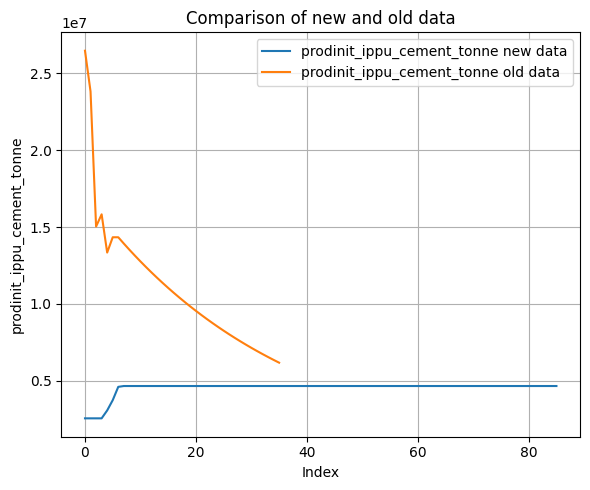

Comparing prodinit_ippu_plastic_tonne...


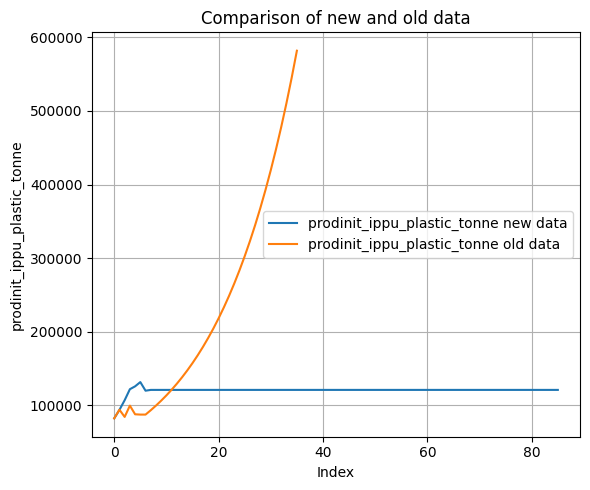

Comparing prodinit_ippu_lime_and_carbonite_tonne...


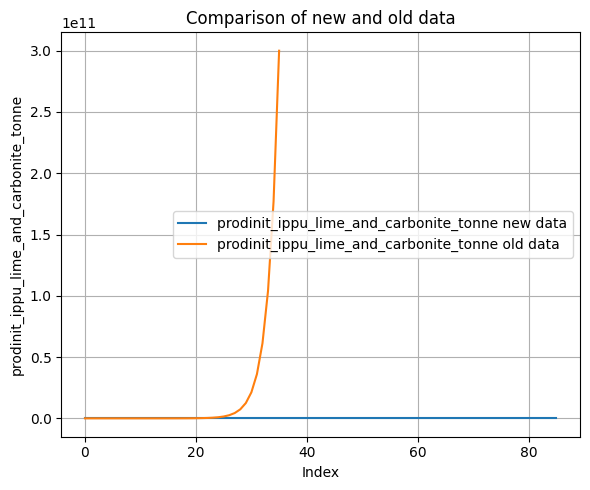

Comparing prodinit_ippu_glass_tonne...


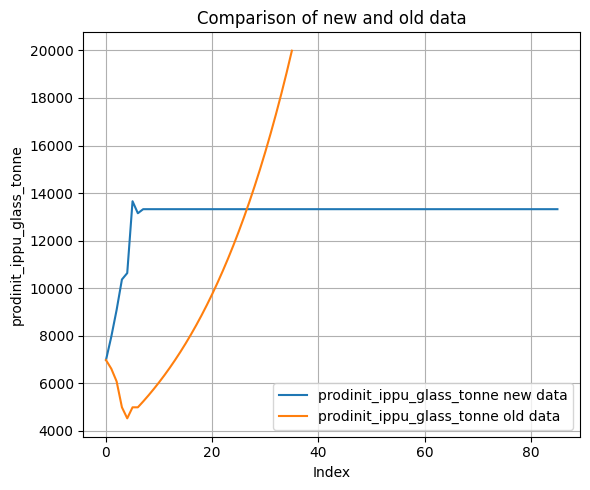

Comparing prodinit_ippu_paper_tonne...


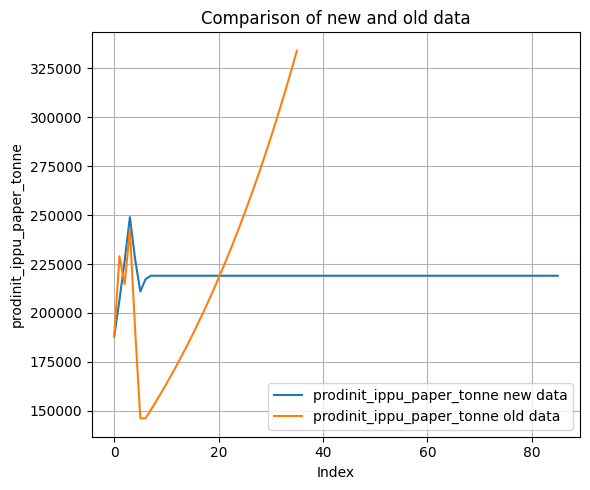

Comparing prodinit_ippu_rubber_and_leather_tonne...


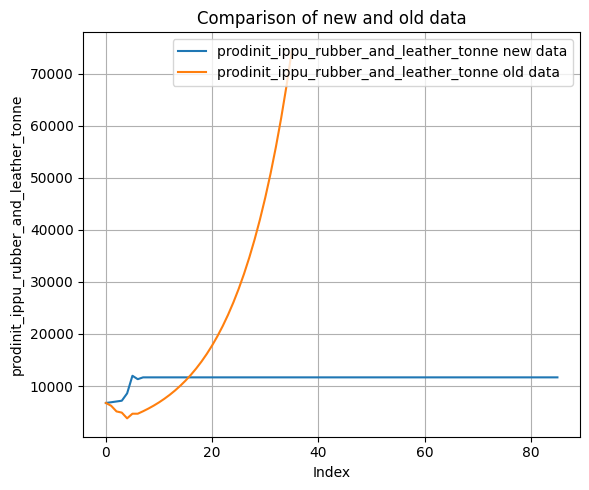

Comparing prodinit_ippu_mining_tonne...


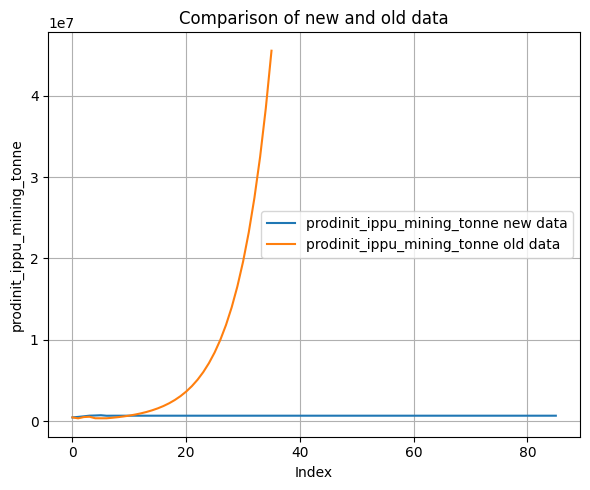

Comparing prodinit_ippu_electronics_tonne...


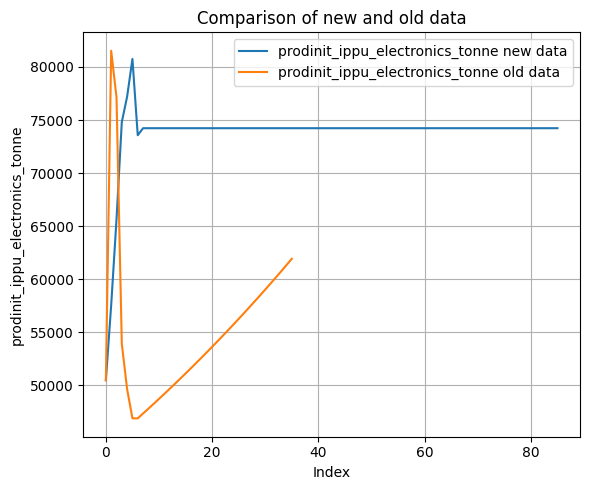

Comparing prodinit_ippu_metals_tonne...


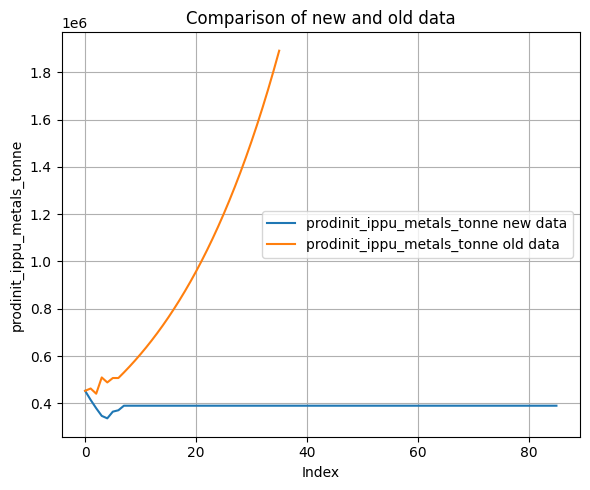

Comparing prodinit_ippu_chemicals_tonne...


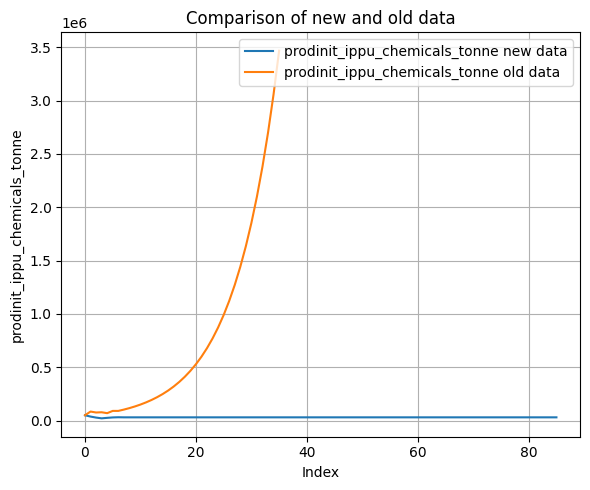

Comparing prodinit_ippu_textiles_tonne...


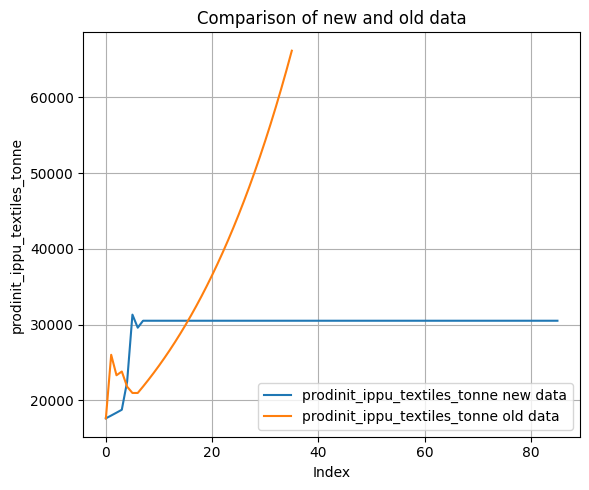

Comparing prodinit_ippu_recycled_metals_tonne...


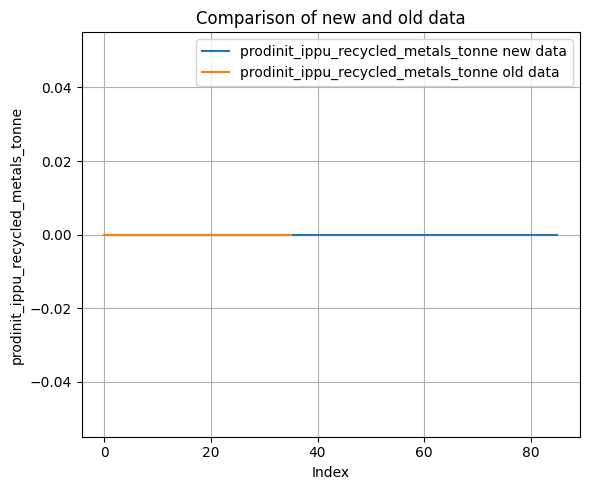

Comparing prodinit_ippu_recycled_rubber_and_leather_tonne...


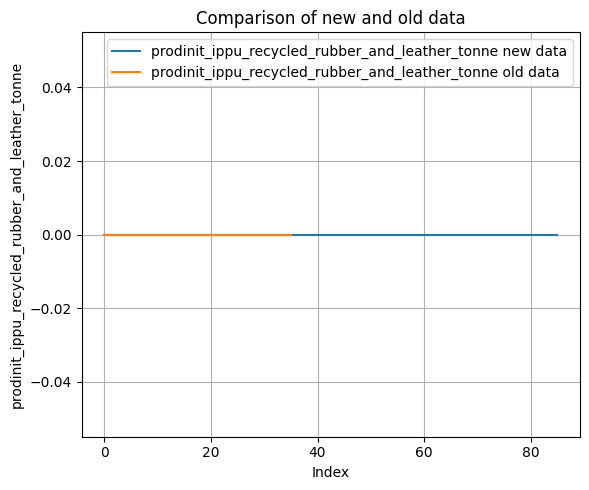

Comparing prodinit_ippu_recycled_textiles_tonne...


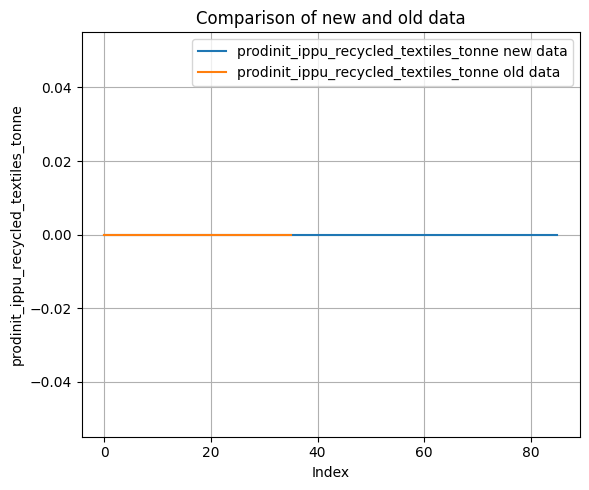

Comparing prodinit_ippu_recycled_plastic_tonne...


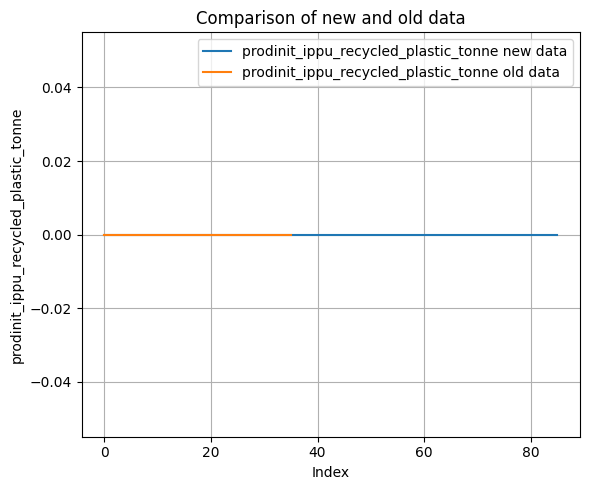

Comparing prodinit_ippu_wood_tonne...


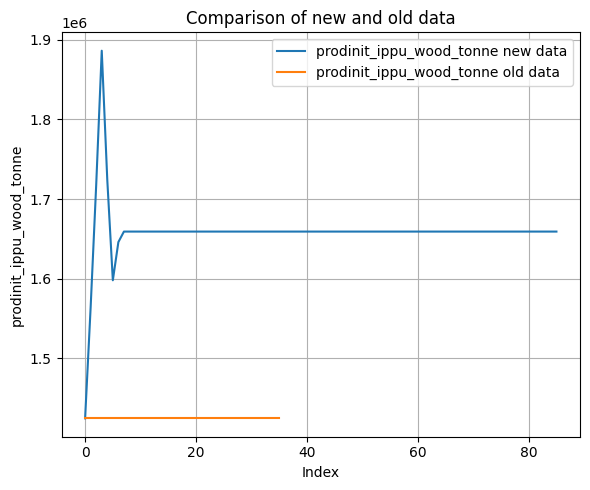

Comparing prodinit_ippu_recycled_glass_tonne...


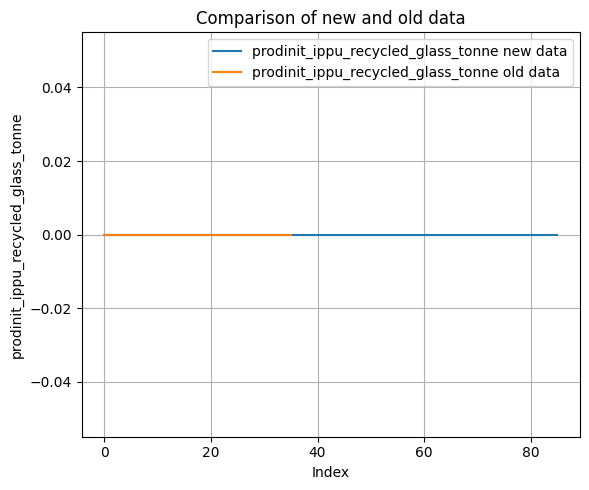

Comparing prodinit_ippu_recycled_paper_tonne...


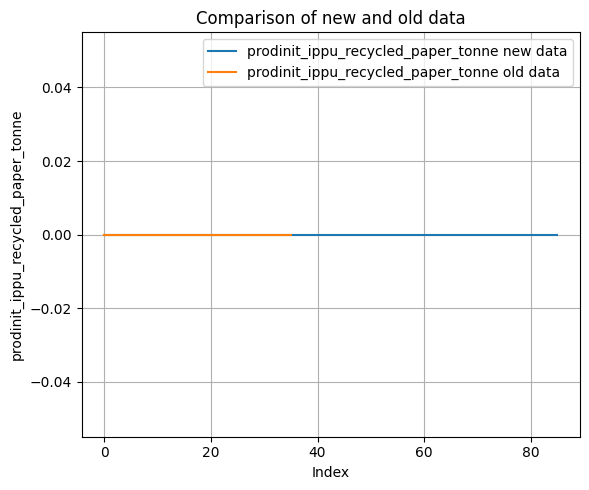

In [20]:
for col in df_projected_extended.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(df_projected_extended, prodinit_ippu_df, [col])

## Save

In [21]:
df_projected_extended.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "prodinit_ippu.csv"), index=False)